# Practical 1: Exploring time series data

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


**Step 1: Import emergency department reattendance data.**  

This is a time series from a hospital that measures the number of patients per month that have reattended an ED within 7 days of a previous attendance.

This can be found in **"data/ed_reattend.csv"**
or 
https://raw.githubusercontent.com/hsma5/9a_introduction_to_forecasting/main/data/ed_reattend.csv

* **Hint 1**: look back at the lecture notes and see how `pd.read_csv()` was used.  

* **Hint 2**: The format of the 'date' column is in UK standard dd/mm/yyyy.  You will need to set the `dayfirst=True` of `pd.read_csv()` to make sure pandas interprets the dates correctly.

* **Hint 3**: The data is monthly and the dates are all the first day of the month.  This is called monthly start and its shorthand is 'MS'

In [22]:
# your code here
f_name = '../data/ed_reattend.csv'
ed_reattend = pd.read_csv(f_name, parse_dates=True,
                       index_col='date', dayfirst=True)

ed_reattend.index.freq = 'MS'

**Step 2: Check the shape of the `DataFrame` and print out the first 5 observations**

In [23]:
# your code here
ed_reattend.shape

(43, 1)

In [24]:
# your code here
ed_reattend.head()

,reattends
date,
2014-04-01,1094
2014-05-01,1266
2014-06-01,1170
2014-07-01,1239
2014-08-01,1197


**Step 3: Check the minimum and maximum date of the series**



In [25]:
# your code here
ed_reattend.min()

reattends    824
dtype: int64

In [58]:
# your code here
ed_reattend.max()
list(ed_reattend.index)
ed_reattend.reattends


date
2014-04-01    1094
2014-05-01    1266
2014-06-01    1170
2014-07-01    1239
2014-08-01    1197
2014-09-01    1196
2014-10-01    1091
2014-11-01    1077
2014-12-01    1060
2015-01-01     978
2015-02-01     964
2015-03-01    1185
2015-04-01    1145
2015-05-01    1168
2015-06-01    1147
2015-07-01    1323
2015-08-01    1181
2015-09-01    1247
2015-10-01    1173
2015-11-01    1182
2015-12-01    1156
2016-01-01     959
2016-02-01    1031
2016-03-01    1212
2016-04-01     939
2016-05-01     981
2016-06-01    1160
2016-07-01    1140
2016-08-01    1161
2016-09-01    1119
2016-10-01    1066
2016-11-01     920
2016-12-01     977
2017-01-01     893
2017-02-01     888
2017-03-01    1029
2017-04-01     913
2017-05-01     910
2017-06-01     881
2017-07-01     990
2017-08-01     862
2017-09-01     850
2017-10-01     824
Freq: MS, Name: reattends, dtype: int64

**Step 4: Create a basic plot of the time series**

Text(0.5, 1.0, 'ED Reattendances')

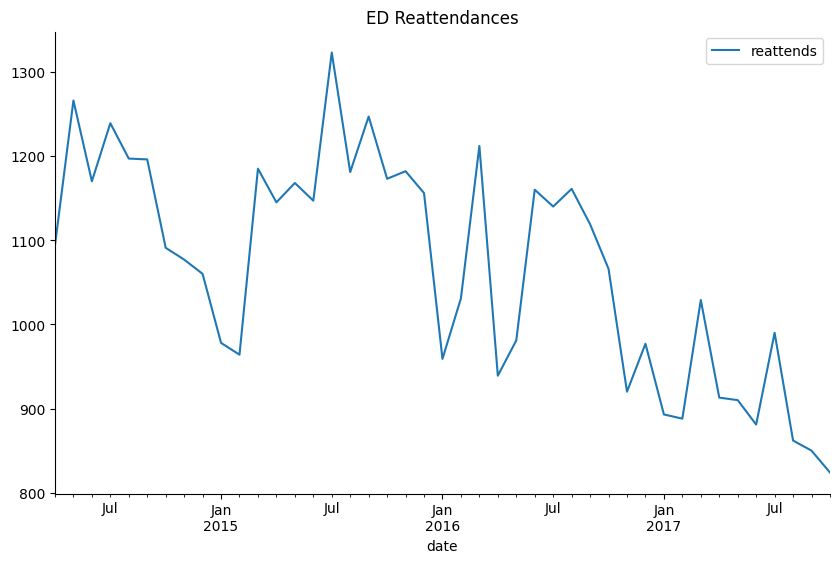

In [28]:
# your code here
ax = ed_reattend.plot( figsize=(10, 6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('ED Reattendances')

**Step 5: Improve the appearance of your chart**
    
Try the following:
    
* Add a y-axis label
* Add gridlines to the plot
* Add markers to block
* Change the colour of the line
* Experiment with using seaborn

Text(0.5, 1.0, 'ED Reattendances')

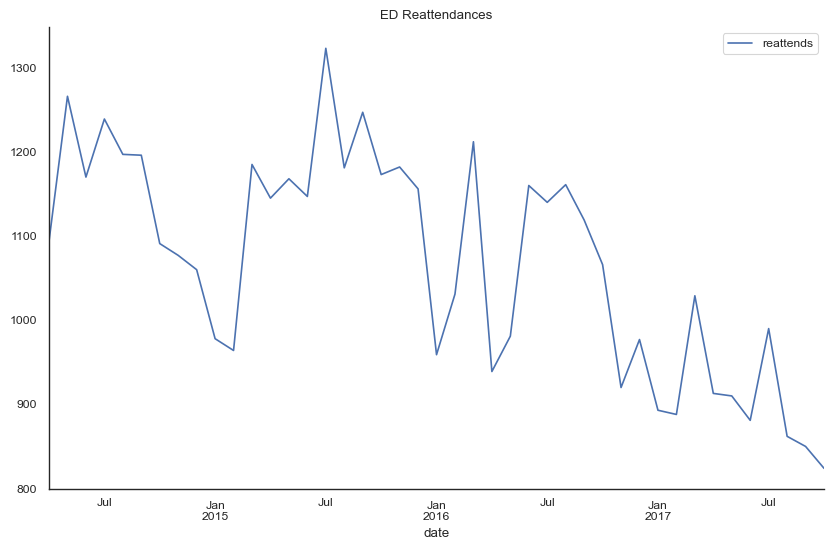

In [62]:
# your code here
sns.set(
    style="white",
    font="Arial",
    context="paper"
)
ax = ed_reattend.plot( figsize=(10, 6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('ED Reattendances')


**Step 6: Perform a calender adjustment**

The data is at the monthly level.  Therefore some of the noise in the time series is due to the differing number of days per month.  Perform a calender adjust and plot the daily rate of reattendance.

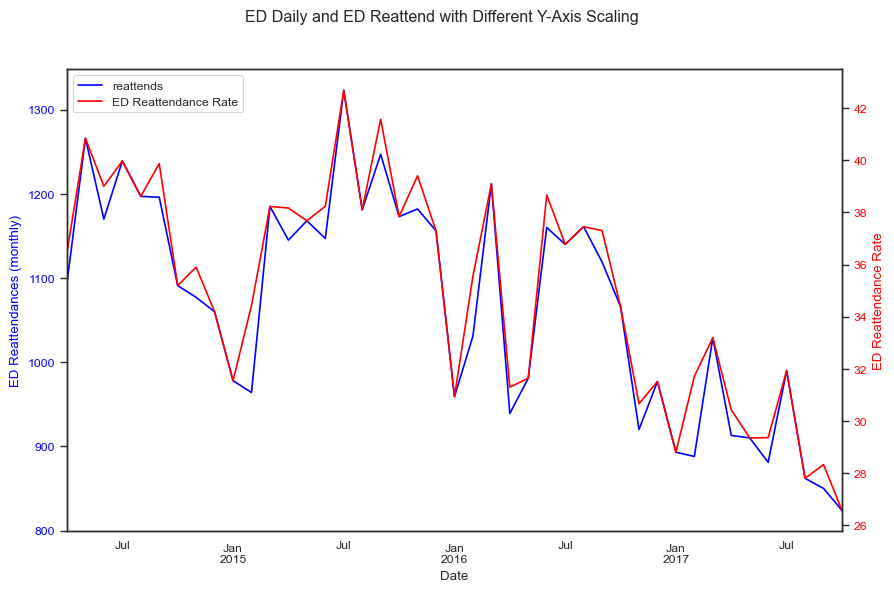

In [75]:
# your code here
ed_reattend.index.days_in_month
ed_r_rate = ed_reattend.reattends / ed_reattend.index.days_in_month
fig, ax1 = plt.subplots(figsize=(10, 6))
ed_reattend.plot(ax=ax1, label = 'ED Reattendances', color='blue')
ax1.set_ylabel('ED Reattendances (monthly)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ed_r_rate.plot(ax=ax2, label = 'ED Reattendance Rate', color='red')

ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax2.set_ylabel('ED Reattendance Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Add legend and labels
fig.suptitle('ED Daily and ED Reattend with Different Y-Axis Scaling')
ax1.set_xlabel('Date')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
_ = ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')


**Step 7: Run a smoother through the series to assess trend**

Hint:  Try using the `.rolling` method of dataframe with a `window=12` and `center=True` to create a 12 month centred moving average 

Is there any benefit from switchoing to a 6 month MA?  Why does the 6-MA look different to the 12-MA.

Use the calender adjusted data.

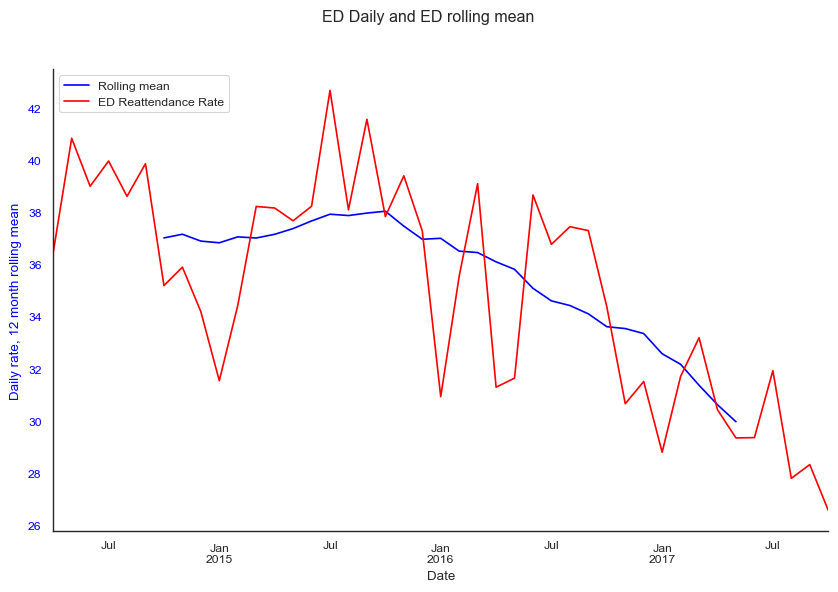

In [83]:
# your code here
rolling_mean = ed_r_rate.rolling(window=12, center=True).mean()

fig, ax = plt.subplots(figsize=(10, 6))
rolling_mean.plot(ax=ax, label = 'Rolling mean', color='blue')
ax.set_ylabel('Daily rate, 12 month rolling mean', color='blue')
ax.tick_params(axis='y', labelcolor='blue')



ed_r_rate.plot(ax=ax,  
               color='red', label = 'ED Reattendance Rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend and labels
fig.suptitle('ED Daily and ED rolling mean')
ax.set_xlabel('Date')

# Combine legends from both axes
lines_1, labels_1 = ax.get_legend_handles_labels()

_ = ax.legend(lines_1, labels_1, loc='upper left')

**Step 8: Perform a seasonal decomposition on the time series**

Plot the trend, seasonal and remainder components of the decomposition.

Try both an additive and multiplicative model.  What is the difference between the two models?

* Hint: Look back at the lecture for a function to help you.




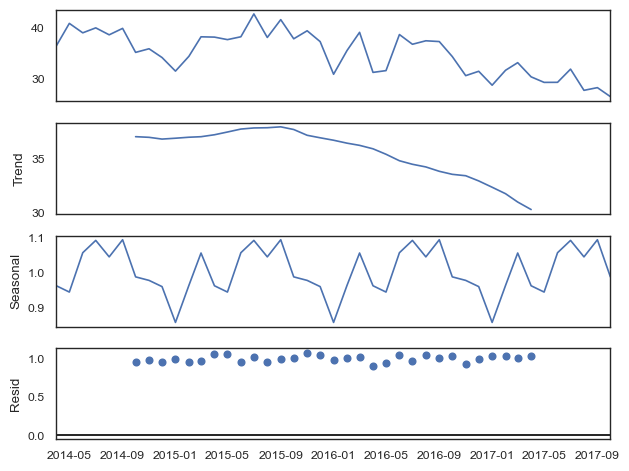

In [94]:
# your code here
add_decomposition = seasonal_decompose(ed_r_rate, model ='additive')

mult_decomposition = seasonal_decompose(ed_r_rate, model ='multiplicative')

ax = mult_decomposition.plot()



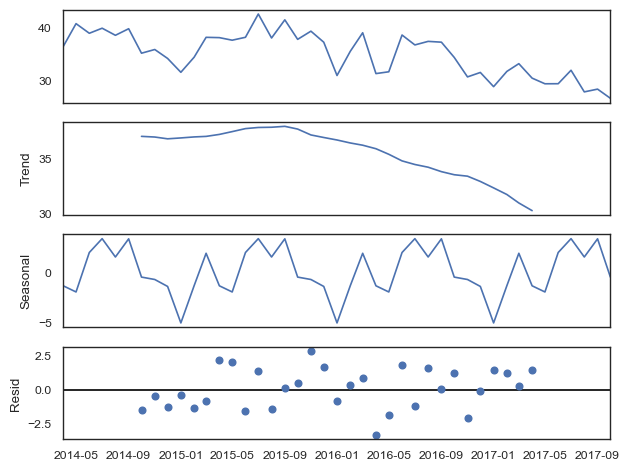

In [93]:
ax = add_decomposition.plot()

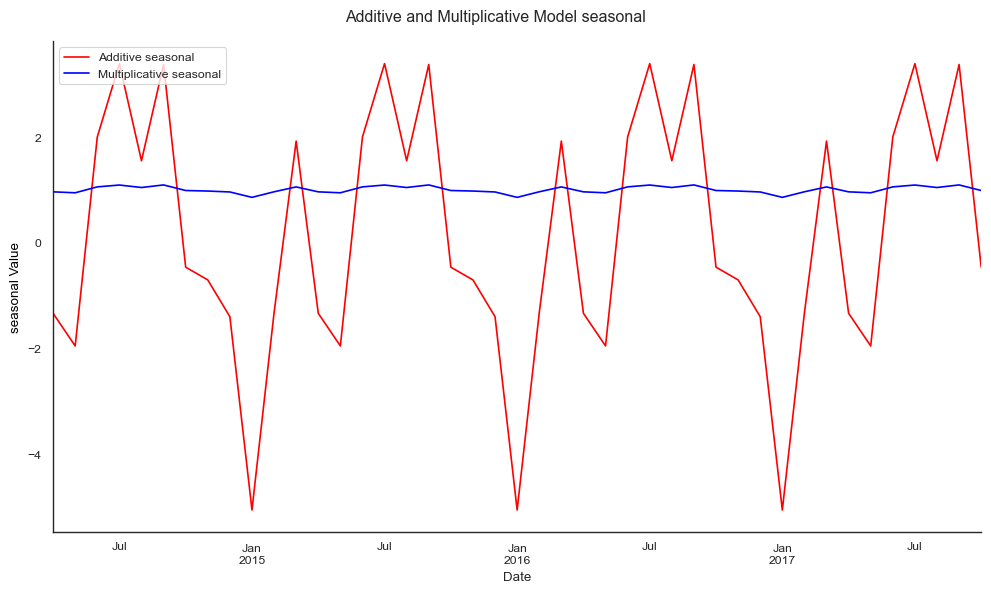

In [107]:

fig, ax = plt.subplots(figsize=(10, 6))

# Plot multiplicative trend

# Plot additive trend
add_decomposition.seasonal.plot(ax=ax, color='red', label='Additive seasonal')

mult_decomposition.seasonal.plot(ax=ax, label='Multiplicative seasonal', color='blue')
# Set labels and title
ax.set_ylabel('seasonal Value', color='black')
ax.set_xlabel('Date')
fig.suptitle('Additive and Multiplicative Model seasonal')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set legend
ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

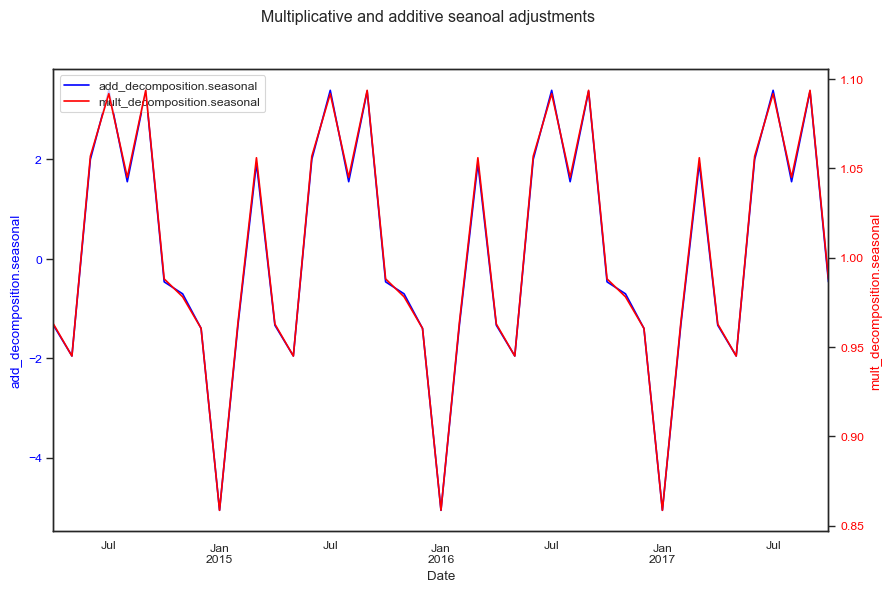

In [108]:
fig, ax1 = plt.subplots(figsize=(10, 6))
add_decomposition.seasonal.plot(ax=ax1, label = 'add_decomposition.seasonal', color='blue')
ax1.set_ylabel('add_decomposition.seasonal', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

mult_decomposition.seasonal.plot(ax=ax2, label = 'mult_decomposition.seasonal', color='red')

ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax2.set_ylabel('mult_decomposition.seasonal', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Add legend and labels
fig.suptitle('Multiplicative and additive seanoal adjustments')
ax1.set_xlabel('Date')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
_ = ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

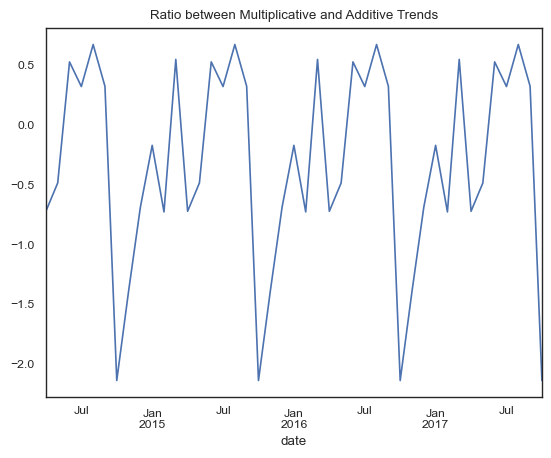

In [112]:
ratiodf = mult_decomposition.seasonal/add_decomposition.seasonal

   
ratiodf.plot()
plt.title('Ratio between Multiplicative and Additive Trends')
plt.show()

date
2014-04-01   -0.721076
2014-05-01   -0.483897
2014-06-01    0.528185
2014-07-01    0.322103
2014-08-01    0.673520
2014-09-01    0.324328
2014-10-01   -2.136387
2014-11-01   -1.390438
2014-12-01   -0.686507
2015-01-01   -0.169795
2015-02-01   -0.726265
2015-03-01    0.548920
2015-04-01   -0.721076
2015-05-01   -0.483897
2015-06-01    0.528185
2015-07-01    0.322103
2015-08-01    0.673520
2015-09-01    0.324328
2015-10-01   -2.136387
2015-11-01   -1.390438
2015-12-01   -0.686507
2016-01-01   -0.169795
2016-02-01   -0.726265
2016-03-01    0.548920
2016-04-01   -0.721076
2016-05-01   -0.483897
2016-06-01    0.528185
2016-07-01    0.322103
2016-08-01    0.673520
2016-09-01    0.324328
2016-10-01   -2.136387
2016-11-01   -1.390438
2016-12-01   -0.686507
2017-01-01   -0.169795
2017-02-01   -0.726265
2017-03-01    0.548920
2017-04-01   -0.721076
2017-05-01   -0.483897
2017-06-01    0.528185
2017-07-01    0.322103
2017-08-01    0.673520
2017-09-01    0.324328
2017-10-01   -2.136387
Freq: 